In [2]:
import numpy as np
import re
import heapq
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

In [4]:
with open('training_update.txt', 'r', encoding='utf-8') as file:
    training_data = file.read()


nltk.download('stopwords')


def text_cleaner(text):
    newString = text.lower()
    newString = re.sub("[^a-zA-Zñáéíóúü ]", " ", newString)
    newString = re.sub('\s+', ' ', newString)
    stop_words = set(stopwords.words('spanish'))
    long_words = [word for word in newString.split() if len(word) >= 3 and word not in stop_words]
    return " ".join(long_words).strip()

def split_into_segments(input_data):
    segments = input_data.split('</entry>')
    cleaned_segments = [re.sub(r'<.*?>', '', segment).strip() for segment in segments if segment.strip()]
    return cleaned_segments


segments = split_into_segments(training_data)
cleaned_segments = [text_cleaner(segment) for segment in segments]

# Example of accessing individual cleaned segments
for segment in cleaned_segments:
    print(segment)
    print("------")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Suzreal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


número pablo ayende maria josefa gomés ciudad havana diez ocho julio mil ochocientos doce años haviendose leydo tres canoni cas amo staciones tres dias festivos resultar pedimen licenciado don andres cascales beneficiado majestad iglesia auxiliar santo angel custodio ciudad havana case velé ritualmente pablo ayende ilegítimo ciudad hijo legítimo josef antonio maria soledad olibos viudo maria carmen fernandez maria josefa catarina gomes misma naturalidad hija legítima juan bautista felipa carvajal pardos libres dhos contrayentes confesaron comulgaron examinados doctrina cristiana siendo padrinos eugenio gomes maria rosa testigos don francisco cortinas don gabriel garcia sacrista nes menores firme licenciado andres cascales
------
josef rafael kongo juana leandra henrique ciudad havana tres agosto milochocien tos doce años haviendose leydo tres canonicas amonestaciones tres días festivos resultar impedimento licenciado don andres cascales beneficiado majestad iglesia auxiliar santo angel

In [17]:
# 2. Tokenizing the text into words
tokenizer = Tokenizer()
tokenizer.fit_on_texts([cleaned_segments])
encoded = tokenizer.texts_to_sequences([cleaned_segments])[0]

In [18]:
# 3. Creating Sequences of Tokens
sequence_length = 5  # Length of the word sequences
sequences = [encoded[i - sequence_length:i+1] for i in range(sequence_length, len(encoded))]

In [19]:
# 4. Preparing the dataset
vocab_size = len(tokenizer.word_index) + 1
sequences = np.array(sequences)
X, y = sequences[:,:-1], sequences[:,-1]
y = to_categorical(y, num_classes=vocab_size)
X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2)

In [20]:
# 5. Defining the Model
model = Sequential()
model.add(Embedding(vocab_size, 50, input_length=sequence_length, trainable=True))
model.add(GRU(150, return_sequences=False))
model.add(Dense(vocab_size, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['accuracy'])

In [21]:
# 6. Training
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5),
    ModelCheckpoint('model.h5', save_best_only=True, monitor='val_loss'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)
]

model.fit(X_tr, y_tr, epochs=50, batch_size=64, validation_data=(X_val, y_val), verbose=1, callbacks=callbacks)

Epoch 1/50
44/44 [==============================] - 2s 20ms/step - loss: 7.7858 - accuracy: 0.0015 - val_loss: 7.6853 - val_accuracy: 0.0000e+00 - lr: 0.0100
Epoch 2/50
44/44 [==============================] - 0s 8ms/step - loss: 7.3627 - accuracy: 0.0131 - val_loss: 7.6644 - val_accuracy: 0.0058 - lr: 0.0100
Epoch 3/50
44/44 [==============================] - 0s 8ms/step - loss: 5.4858 - accuracy: 0.1494 - val_loss: 6.9697 - val_accuracy: 0.1043 - lr: 0.0100
Epoch 4/50
44/44 [==============================] - 0s 8ms/step - loss: 2.6454 - accuracy: 0.4762 - val_loss: 6.6999 - val_accuracy: 0.3826 - lr: 0.0100
Epoch 5/50
44/44 [==============================] - 0s 7ms/step - loss: 0.8132 - accuracy: 0.8448 - val_loss: 7.1220 - val_accuracy: 0.4333 - lr: 0.0100
Epoch 6/50
44/44 [==============================] - 0s 7ms/step - loss: 0.2187 - accuracy: 0.9608 - val_loss: 7.3041 - val_accuracy: 0.4348 - lr: 0.0100
Epoch 7/50
44/44 [==============================] - 0s 8ms/step - loss: 0.068

Epoch 1/10
87/87 [==============================] - 1s 9ms/step - loss: 0.0086 - accuracy: 1.0000 - val_loss: 7.4545 - val_accuracy: 0.4406
Epoch 2/10
87/87 [==============================] - 1s 6ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 7.4696 - val_accuracy: 0.4406
Epoch 3/10
87/87 [==============================] - 1s 6ms/step - loss: 0.0059 - accuracy: 1.0000 - val_loss: 7.4838 - val_accuracy: 0.4406
Epoch 4/10
87/87 [==============================] - 1s 7ms/step - loss: 0.0052 - accuracy: 1.0000 - val_loss: 7.4972 - val_accuracy: 0.4406
Epoch 5/10
87/87 [==============================] - 1s 7ms/step - loss: 0.0046 - accuracy: 1.0000 - val_loss: 7.5098 - val_accuracy: 0.4406
Epoch 6/10
87/87 [==============================] - 1s 7ms/step - loss: 0.0041 - accuracy: 1.0000 - val_loss: 7.5225 - val_accuracy: 0.4406
Epoch 7/10
87/87 [==============================] - 1s 7ms/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 7.5347 - val_accuracy: 0.4406
Epoch 8/10
87/87 [==

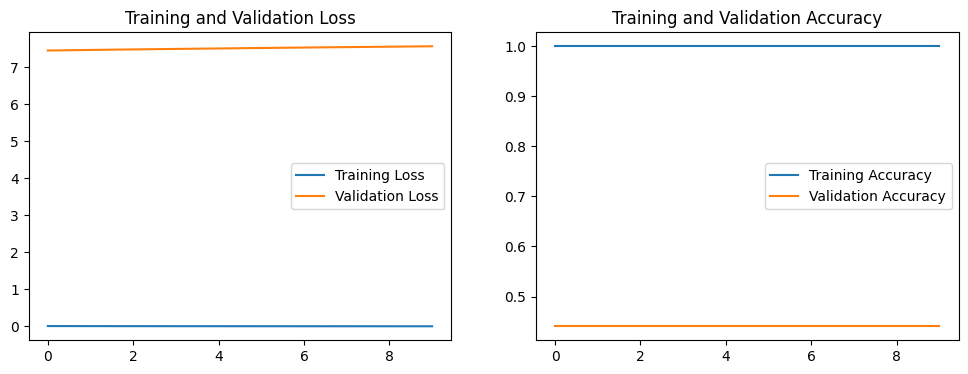

In [25]:
history = model.fit(X_tr, y_tr, validation_data=(X_val, y_val), epochs=10, batch_size=32)

# Accessing the history attribute
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

# Plotting the metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.show()


In [22]:
#Word Level Function
def generate_seq_beam_search(model, tokenizer, seq_length, seed_text, num_words, beam_width=3):
    sequences = [{'seq': seed_text, 'score': 1.0}]
    for _ in range(num_words):
        all_candidates = []
        for i in range(len(sequences)):
            seq, score = sequences[i]['seq'], sequences[i]['score']
            if len(seq) < seq_length:
                sequence = pad_sequences([seq], maxlen=seq_length, truncating='pre')
            else:
                sequence = np.array(seq[-seq_length:]).reshape(1, seq_length)
            
            preds = model.predict(sequence, verbose=0).flatten()
            top_indices = np.argsort(preds)[-beam_width:]

            for j in top_indices:
                candidate = [num for num in seq] + [j]
                candidate_score = score * preds[j]
                all_candidates.append({'seq': candidate, 'score': candidate_score})

        ordered = sorted(all_candidates, key=lambda tup: tup['score'], reverse=True)
        sequences = ordered[:beam_width]
    return sequences

In [23]:
# Define the text before and after the gap
text_before_gap = "Jueves veinte de".lower()
text_after_gap = "mil setecientos".lower()

# Estimate the gap length (this can be a rough estimate or based on context)
gap_length_estimate = 3  # let's say we expect three words to fill the gap

# Prepare the seed text for the gap generation
seed_text = text_before_gap
sequence_seed = tokenizer.texts_to_sequences([seed_text])[0]
seed_text_length = len(sequence_seed)

# Generate the sequence for the gap
results = generate_seq_beam_search(model, tokenizer, sequence_length, sequence_seed, gap_length_estimate, beam_width=3)
best_sequence = results[0]['seq']

# Convert the sequence of indices to words
predicted_gap_content = ' '.join(tokenizer.index_word.get(idx, '') for idx in best_sequence[seed_text_length:])

# Merge the content to complete the sentence
completed_sentence = text_before_gap + ' ' + predicted_gap_content + ' ' + text_after_gap
print(completed_sentence)

jueves veinte de felipa domingo veinte tres junio mil setecientos qua renta ocho doctor don lorenzo noriega marroquin cura parroquial san carlos ciudad matansas bautise puse santos oleos auna morena adulta nasion kongo esclava don juan justis qual exersi sacras seremonias preses puse nombre felipa madrina maria lorenza firme doctor lorenzo noriega marroquin maria magdalena sientos cuarenta marroquin cura ciudad matan auna morena adulta don juan justis qual exer sacras seremonias preses puse nombre maria magdalena madrina maria jesus firme doctor lorenzo noriega marroquin felisiana domingo veinte tres junio mil setecientos quaren ocho doctor don lorenzo noriega marroquin cura parroquial san carlos ciudad matansas bautise puse santos oleos auna rena nasion kongo adulta esclava don juan justis qual exersi sacras seremonias preses puse nombre felisiana madrina maria mora firme doctor lorenzo noriega marroquin mil setecientos
